# 6.05 Unsupervised ML: Clustering

## Content
01 Import libraries  
02 Import data, cleaning, manipulation, reprocessing  
03 k-Means  
04 Analysis and visualisations

# 01 Import libraries

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [48]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

# 02 Import data, cleaning, manipulation, reprocessing
Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).  
- Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.  
- Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.

In [50]:
# Import insurace data
path=r'/Users/DA77/CF/Open_Data_Project/02_Data'
insurance=pd.read_csv(os.path.join(path,'2.02_Prepared_Data','insurance_clean.csv'),index_col=0 )

In [52]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Pre-processing

In [54]:
# Remove categorical variable, i.e. only take age, children for k-mean
insurance_num = insurance[['bmi','age', 'children', 'charges']]

In [56]:
# Standardise data with StandardScaler 
from sklearn.preprocessing import StandardScaler

# Selecting the numerical columns
features = ['bmi', 'age', 'children', 'charges']
insurance_num = insurance[features]

# Standardizing the data
scaler = StandardScaler()
insurance_scaled = scaler.fit_transform(insurance_num)

# Convert back to a DataFrame (optional, for better readability)
import pandas as pd
insurance_scaled_df = pd.DataFrame(insurance_scaled, columns=features)

# Display the first few rows
print(insurance_scaled_df.head())

        bmi       age  children   charges
0 -0.453320 -1.438764 -0.908614  0.298584
1  0.509621 -1.509965 -0.078767 -0.953689
2  0.383307 -0.797954  1.580926 -0.728675
3 -1.305531 -0.441948 -0.908614  0.719843
4 -0.292556 -0.513149 -0.908614 -0.776802


**Note**. Smoking also was dropped, althought it was important variable, but no numerical data of smoking available and is an important explanatory variable.

# 03 k-means

## Task 3. Elbow Technique 
Use the elbow technique as shown in the Jupyter notebook for this Exercise. 

In [58]:
# Started with 10 clusters, but adjusted to 15 to make the elbow more visible
num_cl = range(1, 15) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [60]:
score = [kmeans[i].fit(insurance_scaled_df).score(insurance_scaled_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-5352.0,
 -4087.8291309788456,
 -3312.5035499371543,
 -2572.3960956680066,
 -2226.3018919739034,
 -2078.2909412424438,
 -1888.9552363051014,
 -1659.5635007037813,
 -1553.8586761227868,
 -1467.1338218293827,
 -1468.8850128007002,
 -1320.2033020038984,
 -1331.682867072379,
 -1204.312629041902]

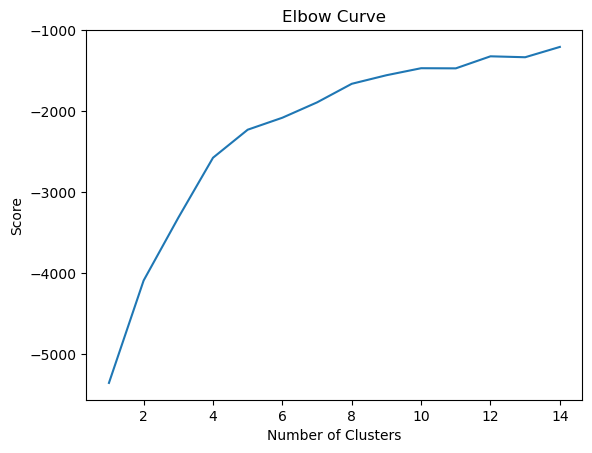

In [62]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## Task 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
Explain why you chose that number in a markdown cell.  
If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestions.  

**Interpretation**. Based on the elbow graph, I would choose 5 clusterns, as you can see the decrease of the graph is sharp from k=1 to K=5, after that the graph get flatter, beyond that the imporvement become more marginal. If I wanted slightly finer segmentation, go with k = 6. However, since I prioritize stability & fewer clusters, I choose k = 5 (also considering the few explaining variables in the model it doesn't make sense to have many groups). 

## Task 5. Run the k-means algorithm.

In [64]:
# 1 Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [66]:
# 2 Fit the k-means object to the data.

kmeans.fit(insurance_scaled_df)

KMeans(n_clusters=5)

## Task 6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [68]:
# 3 Create new 'clusters' columns and attach to df
insurance_scaled_df['clusters'] = kmeans.fit_predict(insurance_scaled_df)

In [70]:
# Preview the new df
insurance_scaled_df.head()

,bmi,age,children,charges,clusters
0,-0.453320,-1.438764,-0.908614,0.298584,1
1,0.509621,-1.509965,-0.078767,-0.953689,1
2,0.383307,-0.797954,1.580926,-0.728675,3
3,-1.305531,-0.441948,-0.908614,0.719843,0
4,-0.292556,-0.513149,-0.908614,-0.776802,1


In [88]:
insurance_scaled_df.to_csv(r'/Users/DA77/CF/Open_Data_Project/02_Data/2.02_Prepared_Data/insurance_cluster_scaled.csv', index=False)

In [74]:
# 4 Check number of obersvations per column with value_counts() 
insurance_scaled_df['clusters'].value_counts()

clusters
1    381
3    293
0    283
4    218
2    163
Name: count, dtype: int64

# 04 Analysis and visualisations

## Task 7. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

**Note**. Since the clustering was done on standardised data, K-Means centroid visualization, I will continue using the standardise data for visualisations (insurance_scaled_df). 

### BMI & Charges

In [31]:
# Plot the clusters for the "bmi" and "charges" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=insurance_scaled_df['bmi'], y=insurance_scaled_df['charges'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('BMI') # Label x-axis.
plt.ylabel('Healthcare Charges') # Label y-axis.

Text(0, 0.5, 'Healthcare Charges')

In [46]:
# Export 
plt.savefig(r'/Users/DA77/CF/Open_Data_Project/04_Analysis/4.05_Cluster_Visuals/cluster_bmi_charges.png')

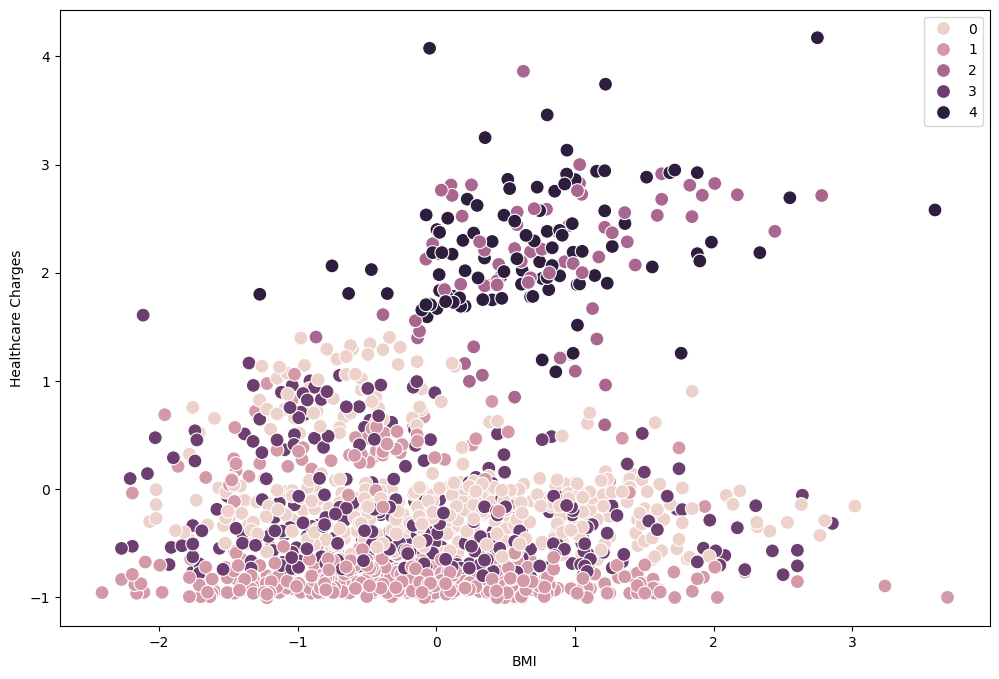

In [33]:
plt.show()

### Age & Charges

In [35]:
# Plot the clusters for the "age" and "charges" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=insurance_scaled_df['age'], y=insurance_scaled_df['charges'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Age') # Label x-axis.
plt.ylabel('Healthcare Charges') # Label y-axis.

Text(0, 0.5, 'Healthcare Charges')

In [36]:
# Export 
plt.savefig(r'/Users/DA77/CF/Open_Data_Project/04_Analysis/4.05_Cluster_Visuals/cluster_age_charges.png')

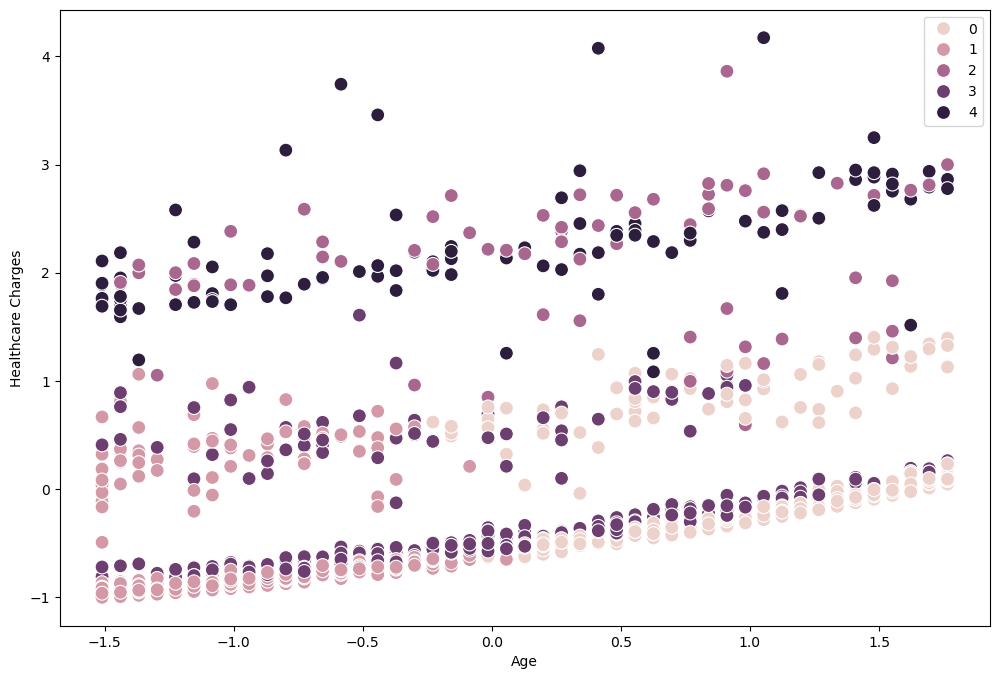

In [37]:
plt.show()

## Task 8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
Note down your thoughts in a markdown cell.

**Intepretation**. Both clusters align with previous findings of the pair plot (that included smoking):  

**BMI & Charges**: It was previously already noticed that BMI for some patients has a stronger impact on charges than other. In previous pair plor, this difference was explained through smoking (categorical, hence not included here). 
For group 0, 1 and 3. Charges stay below a level (here standardadise as 0), for both lower and higher BMI. - these could be non-smoker both obese and non-obese. 

For group 2 and 4: BMI is at obese level(higher 0, which was around 3 before standardisation), or higher, but charges are much higher compared to individuals with similar or higher BMI in groups 0,1 and 3. These are likely patients that are both obese and smokers. 

This results makes sense as it confirms previous findings and enables more distinve groupings of patients. 

**Age & Charges**: This also confirms the findings of the pair plot. It shows that for groups 0,1,3 a linear regression could work well as a predictive model, as a positive relationship between sharges and ages exists (though not steep).In accordance to the pair plot, these group consists of non-smokers.

Group 2&4 again describes the outlier group where for all ages, all charges are siginifcantly higher. In accordance to the pair plot, this group conists of smokers. 

## Task 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

**Note**. I used standardised variables for k-means. To make sense of descriptive statistics, change them back. 

In [76]:
# Reverse the standardisation with inverserse_transform() 
# Re-initialize the StandardScaler and fit it on the original data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(insurance[["bmi", "age", "children", "charges"]])  # Fit on original data

# Exclude the cluster labels from inverse transformation
insurance_scaled_values = insurance_scaled_df.drop(columns=["clusters"], errors="ignore")  

# Apply inverse transformation
insurance_original_scale = pd.DataFrame(
    scaler.inverse_transform(insurance_scaled_values),  # Only transform numeric columns
    columns=insurance_scaled_values.columns
)

# Add back the cluster labels
insurance_original_scale["clusters"] = insurance_scaled_df["clusters"]  

In [78]:
# Rename the clusters based on findings in scatterplot in knowledge from pair plot that included smoking 
insurance_original_scale.loc[insurance_original_scale['clusters'] == 0, 'cluster'] = '0:all ages, all BMI, non-smoking'
insurance_original_scale.loc[insurance_original_scale['clusters'] == 1, 'cluster'] = '1:all ages, all BMI, non-smoking'
insurance_original_scale.loc[insurance_original_scale['clusters'] == 2, 'cluster'] = '2:all ages, BMI 30+, smoking'
insurance_original_scale.loc[insurance_original_scale['clusters'] == 3,'cluster'] = '3:all ages, all BMI, non-smoking'
insurance_original_scale.loc[insurance_original_scale['clusters'] == 4,'cluster'] = '4:all ages, BMI 30+, smoking'

In [80]:
# Descriptive statistics. 
grouped_stats = insurance_original_scale.groupby("cluster").describe()

In [82]:
# Show all descrptive statisics 
grouped_stats

bmi                                        \
                                  count       mean       std     min      25%   
cluster                                                                         
0:all ages, all BMI, non-smoking  283.0  27.173322  3.686578  18.050  24.7950   
1:all ages, all BMI, non-smoking  381.0  28.557021  5.153746  15.960  25.1750   
2:all ages, BMI 30+, smoking      163.0  35.414417  4.167948  26.070  32.3000   
3:all ages, all BMI, non-smoking  293.0  28.519300  4.926352  16.815  24.7950   
4:all ages, BMI 30+, smoking      218.0  38.204794  3.918279  31.635  35.7275   

                                                          age             ...  \
                                    50%     75%    max  count       mean  ...   
cluster                                                                   ...   
0:all ages, all BMI, non-smoking  27.36  30.010  34.50  283.0  52.554770  ...   
1:all ages, all BMI, non-smoking  28.50  31.920  41.14  381.0  24.776903  ...   
2:all ages, BMI 30+, smoking      35.09  37.070  52.58  163.0  39.938650  ...   
3:all ages, all BMI, non-smoking  28.69  32.110  46.75  293.0  38.976109  ...   
4:all ages, BMI 30+, smoking      37.40  40.275  53.13  218.0  46.862385  ...   

                                       charges              clusters       \
                                           75%          max    count mean   
cluster                                                                     
0:all ages, all BMI, non-smoking  15420.229525  35160.13457    283.0  0.0   
1:all ages, all BMI, non-smoking   5003.853000  26125.67477    381.0  1.0   
2:all ages, BMI 30+, smoking      44462.600600  63770.42801    163.0  2.0   
3:all ages, all BMI, non-smoking  13047.332350  32787.45859    293.0  3.0   
4:all ages, BMI 30+, smoking      11828.292150  24227.33724    218.0  4.0   

                                                                
                                  std  min  25%  50%  75%  max  
cluster                                                         
0:all ages, all BMI, non-smoking  0.0  0.0  0.0  0.0  0.0  0.0  
1:all ages, all BMI, non-smoking  0.0  1.0  1.0  1.0  1.0  1.0  
2:all ages, BMI 30+, smoking      0.0  2.0  2.0  2.0  2.0  2.0  
3:all ages, all BMI, non-smoking  0.0  3.0  3.0  3.0  3.0  3.0  
4:all ages, BMI 30+, smoking      0.0  4.0  4.0  4.0  4.0  4.0  

[5 rows x 40 columns]

In [84]:
# Selected group stats only, sorted in descending order based on median 'charges' 
insurance_cluster_summary = (
    insurance_original_scale.groupby("cluster")
    .agg({
        "charges": ["mean", "median"],
        "bmi": ["mean", "median"],
        "age": ["mean", "median"],
        "children": ["mean", "median"]
    })
    .sort_values(by=("charges", "median"), ascending=False)  # Sorting by median 'charges' in descending order
)
# Display the result
print(insurance_cluster_summary)

                                       charges                     bmi         \
                                          mean       median       mean median   
cluster                                                                         
2:all ages, BMI 30+, smoking      40427.125227  39836.51900  35.414417  35.09   
0:all ages, all BMI, non-smoking  13970.305937  11842.62375  27.173322  27.36   
4:all ages, BMI 30+, smoking       9393.750883   9013.10620  38.204794  37.40   
3:all ages, all BMI, non-smoking  10719.707508   8522.00300  28.519300  28.69   
1:all ages, all BMI, non-smoking   5312.060384   3062.50825  28.557021  28.50   

                                        age         children         
                                       mean median      mean median  
cluster                                                              
2:all ages, BMI 30+, smoking      39.938650   41.0  1.165644    1.0  
0:all ages, all BMI, non-smoking  52.554770   53.0  0.441696    0.0  
4

In [90]:
# Export insurance cluster with original scale
insurance_original_scale.to_csv(r'/Users/DA77/CF/Open_Data_Project/02_Data/2.02_Prepared_Data/insurance_cluster_unscaled.csv')

**Interpretation**. While the visual analysis already helped to distinguish between smokers and non-smokers, this overview helps to further draw differentiations based on mean BMI, and age (and children, though had no relationshio with charges in pair plot) within smokers and within non-smokers. 

It allows a ranking, starting with median highest charges, mean children)
1. Group 2 (smoking, median BMI 35, median age 44, 2.4 children)
2. Group 4 (smoking, median BMI 35, median age 37, 0.4 children)
3. Group 0 (non-smoking, median BMI 30, median age 53, 0.4 children) 
4. Group 3 (non-smoking, median BMI 30, median age 39, 2.7 children)
5. Group 1 (non-smoking, median BMI 29, median age 24, 0.4 children).

**Diskussion**. 
The results confirm that **smoking is the most significant factor influencing insurance charges**, as the top two groups with the **highest median charges** are **smokers**. However, additional patterns emerge based on **BMI, age, and children**:  

- **Smokers (Groups 2 & 4) pay the highest charges**, with **higher BMI** and **middle age ranges** (37–44). This suggests that older smokers with a BMI of 35 are at particularly high risk.  
- **Non-smokers (Groups 0, 3, and 1) have lower charges**, with a clear ranking based on **age and BMI**.  
- **Number of children has little impact on charges**, confirming earlier observations from pair plots. However, within non-smokers, **higher age and BMI seem to correlate with higher charges**.  

These findings highlight **clear risk groups** for insurance companies, with **smokers consistently having higher costs regardless of other factors**

## Task 10. Propose what these results could be useful for in future steps of an analytics pipeline.

Future Applications in an Analytics Pipeline  

These insights can be leveraged in various ways for **predictive modeling, segmentation, and business strategy**:  

#### 1 Risk-Based Pricing for Insurance Plans  
- Use the **identified high-cost groups** to adjust **premium pricing** based on risk levels.  
- Design **customized insurance plans** for high-risk (smokers) vs. low-risk (non-smokers) individuals.  

#### 2 Predictive Modeling & Machine Learning  
- Use K-Means clusters as **features** in a regression/classification model to **predict future medical costs**.  
- Develop a **classification model** to predict whether a person will fall into a high-cost group.  

#### 3 Targeted Health & Prevention Programs  
- **Wellness incentives** for high-risk groups (e.g., smoking cessation programs for Groups 2 & 4).  
- **BMI reduction plans** for certain non-smoking groups (e.g., Group 0).  

#### 3 Customer Segmentation for Marketing & Outreach  
- Personalized **marketing strategies** based on cluster profiles.  
- Identify **young non-smokers (Group 1) as potential low-risk customers** for cost-effective insurance plans.  

---

**Conclusion**
These results provide **data-driven insights** that can be directly applied to **pricing, risk assessment, predictive modeling, and targeted health programs**.  